# Analyzing and Understanding the BBC Face Recognition Test dataset. 
[BBC Results](https://docs.google.com/spreadsheet/ccc?key=0Alo47BBiqLE0dDFWUUd6MVVMd3FfQXlNWG5rMXJOWnc#gid=0)

Download the dataset as csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set() 

In [2]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

In [3]:
# here's the path to the dataset
datapath = 'data/BBC.csv'

## Data Cleaning

Let's use Pandas to do some data cleaning and understand what our data looks like

This dataset comes with a bunch of column that doesn't interest us. We're only interested in 3 columns, so we'd extract those three columns with an additional param `usecols`</br>

Columns we're interested in are:
- Number of hours slept
- Recognition Score
- Temporal Score

We can drop the rest of the column

In [4]:
# usecols says hey! I only want col 1 to 4
df = pd.read_csv(datapath, usecols=range(1,4))

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,How many hours did you sleep last night?,Recognition Score,Temporal Memory Score
0,7.0,91,86
1,6.5,95,78
2,7.0,95,56
3,5.0,91,81
4,8.5,100,75


## Rename Column

Let's rename this headers to something a little easier to work with

In [7]:
column_name_map = {
    'How many hours did you sleep last night?': 'no_hours_slept',
    'Recognition Score': 'recognition_score',
    'Temporal Memory Score': 'temp_memory_score'
}

In [8]:
df = df.rename(column_name_map, axis=1)
df.head()

,no_hours_slept,recognition_score,temp_memory_score
0,7.0,91,86
1,6.5,95,78
2,7.0,95,56
3,5.0,91,81
4,8.5,100,75


## Dataset Count 

In [9]:
df.count()

no_hours_slept       9154
recognition_score    9097
temp_memory_score    9083
dtype: int64

From the count we notice that the length of `Number of hours slept coulumn` is more than the rest of the column which means we might have some value with NaN

## Data types

In [10]:
df.dtypes

no_hours_slept       float64
recognition_score     object
temp_memory_score     object
dtype: object

###  Check for NaN

In [11]:
df[df.isnull().values].count()

no_hours_slept       130
recognition_score     22
temp_memory_score      8
dtype: int64

Yup! we've got NaN :)

In [12]:
df[df.isnull().values].tail()

,no_hours_slept,recognition_score,temp_memory_score
9152,8.0,NaN,NaN
9154,5.5,NaN,NaN
9154,5.5,NaN,NaN
9155,5.5,NaN,NaN
9155,5.5,NaN,NaN


### Drop NaN

In [13]:
df2 = df.dropna()

In [14]:
df2[df2.isnull().values].count()

no_hours_slept       0
recognition_score    0
temp_memory_score    0
dtype: int64

Good! No NaN anymore, so let's count then number of data we have

In [15]:
df2.count()

no_hours_slept       9075
recognition_score    9075
temp_memory_score    9075
dtype: int64

Awesome! we now have equal data which we think correctly represents the information we need

Let's check the tail of this partly cleaned dataset

In [16]:
df2.tail()

,no_hours_slept,recognition_score,temp_memory_score
9148,8.0,95,86
9149,7.0,70,94
9150,7.5,79,75
9151,8.0,0,0
9153,1.0,ee,ee


Oh! oh! what's the 'ee' in our dataset? is that a number in another language :) What else could be present that we don't need ? Maybe we should check to make sure all the values are numerical

Now, we can see that we're yet to be done data cleaning. We need to make sure that:

- The hours, Recognition Score and Temporal Memory Score are numbers
---------------------


## Remove string characters from dataset

While inspecting the dataset, I noticed that we have some values with % like 40% , 96& etc. 

### Replace any char which follows a number with " "

In [17]:
df2.dtypes

no_hours_slept       float64
recognition_score     object
temp_memory_score     object
dtype: object

We'd be manipulating these strings using Regex, so let's make sure all the columns are string

In [18]:
df2 = df2.astype(str)

In [19]:
df2.dtypes

no_hours_slept       object
recognition_score    object
temp_memory_score    object
dtype: object

Let's check if any of the cell contains %

In [20]:
contains_percent = lambda x: x.str.contains('%')
df2.apply(contains_percent).any()

no_hours_slept       False
recognition_score     True
temp_memory_score     True
dtype: bool

Replace % with ""

In [22]:
replace_percent = lambda x: x.replace(to_replace=r'^(\d+)\D$', value='\g<1>', regex=True)
df3 = df2.apply(replace_percent)


Do we still have any char after digits ?

In [23]:
df3.apply(contains_percent).any()

no_hours_slept       False
recognition_score    False
temp_memory_score    False
dtype: bool

### Replace char string with NaN

In [24]:
replace_char = lambda x: x.replace(to_replace=r'[A-Za-z]', value=np.nan, regex=True)
df4 = df3.apply(replace_char)

In [25]:
df4.tail()

,no_hours_slept,recognition_score,temp_memory_score
9148,8.0,95,86
9149,7.0,70,94
9150,7.5,79,75
9151,8.0,0,0
9153,1.0,NaN,NaN


In [26]:
df5 = df4.dropna()

In [27]:
df5[df5.isnull().values].count()

no_hours_slept       0
recognition_score    0
temp_memory_score    0
dtype: int64

In [28]:
df5.count()

no_hours_slept       9071
recognition_score    9071
temp_memory_score    9071
dtype: int64

## Drop column with value > 100%

According to the survey, the Temporal Memory Score as well as Recognition Score should be 100%. That means any data collected for either of this two greater than 100% is null

Convert the type to float

In [29]:
df5 = df5.astype(float)
df5.dtypes

no_hours_slept       float64
recognition_score    float64
temp_memory_score    float64
dtype: object

Number of elements greater than 100

In [31]:
df5[(df5['recognition_score'] > 100) | (df5['temp_memory_score'] > 100 ) ].count()

no_hours_slept       292
recognition_score    292
temp_memory_score    292
dtype: int64

We can remove anything less than or equal to 100

In [32]:
df_final = df5[(df5['recognition_score'] <= 100) & (df5['temp_memory_score'] <= 100 ) ]

In [33]:
df_final.count()

no_hours_slept       8779
recognition_score    8779
temp_memory_score    8779
dtype: int64

In [34]:
# Swap columns back
column_name_map_2 = { val:key for key,val in column_name_map.items() }

df_final = df_final.rename(column_name_map_2, axis=1)
df_final.head()

,How many hours did you sleep last night?,Recognition Score,Temporal Memory Score
0,7.0,91.0,86.0
1,6.5,95.0,78.0
2,7.0,95.0,56.0
3,5.0,91.0,81.0
4,8.5,100.0,75.0


##  Data Analyzing

### Max and Min sleep hours

In [35]:
# convert to numpy
arr = df_final.values

In [36]:
arr.shape

(8779, 3)

In [37]:
arr.dtype

dtype('float64')

In [38]:
max_sleep_hrs = np.max(arr[:, 0])
min_sleep_hrs = np.min(arr[:, 0])

print (min_sleep_hrs, max_sleep_hrs)

0.0 23.5


*confused* - how will people have 0 sleep ??? and 23.5hrs sleep ??? <br> Well, that's what the data says

Let's check how many people actually got zero sleep before the survey

In [39]:
arr[arr[:, 0] <= 0].shape

(542, 3)

Interesting!

How about how many peope got more than 20 hours sleep ?

In [41]:
arr[arr[:, 0] >= 20].shape

(2, 3)

hmm! Ok

But what's the average number of sleep from this survey ?

In [42]:
np.mean(arr[:,0])

6.710502335117895

Ok, Not bad

Can we know the highest number sleep hours from this survey ?

In [43]:
# numpy doesn't have mode, so we'd use scipy
from scipy import stats
stats.mode(arr[:, 0])

ModeResult(mode=array([7.]), count=array([1555]))

Ah! nice, so an alot of the people who filled this survey got about 7 hours sleep a night before

According to [this](https://www.helpguide.org/articles/sleep/sleep-needs-get-the-sleep-you-need.htm) article, an average healthy adult should get atleast 7 - 9 hours of sleep.


Assuming all the people who took this survey are adult - then we've got a good number of healthy adults :)

---------------------

### Distribution of No of hrs Slept

Text(0,0.5,'Frequency')

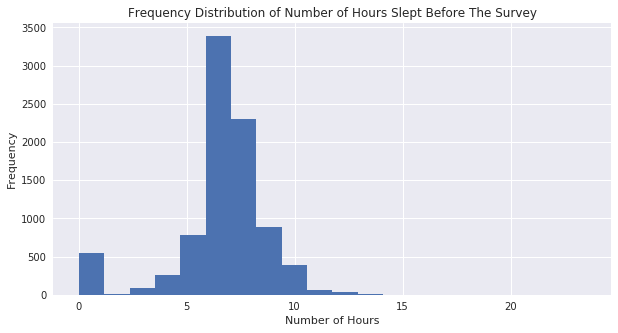

In [44]:
_ = plt.hist(arr[:, 0], bins=20)
plt.title("Frequency Distribution of Number of Hours Slept Before The Survey")
plt.xlabel("Number of Hours")
plt.ylabel("Frequency")

We can see that we have more data skewed to the left meaning most of the people from this survey got less than 9 hours of sleep

### Here's what the swarm plot for the first (1000 No of hours) looks like

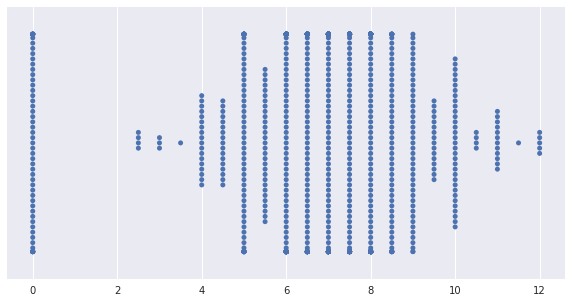

In [45]:
# this might run slow on your computer. 
# You probably shouldn't run this cell except you're patient or run with fewer dataset
sns.swarmplot(x=arr[:, 0][:1000])

### Let's plot the Empirical Cummulative Distribution Function

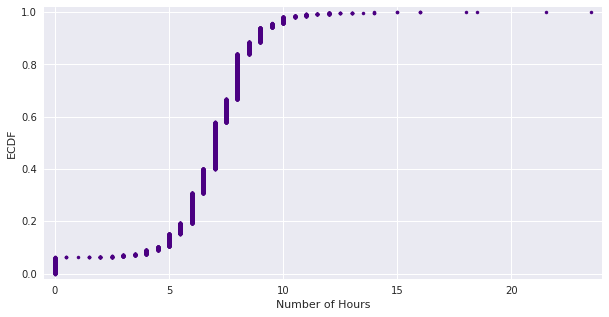

In [46]:
plt.plot(np.sort(arr[:, 0]), np.linspace(0, 1, len(arr[:, 0]), endpoint=False), 
                     color="indigo", marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('Number of Hours')
plt.margins(0.02)

### Hours slept Vs Recognition Score
Let's plot a graph

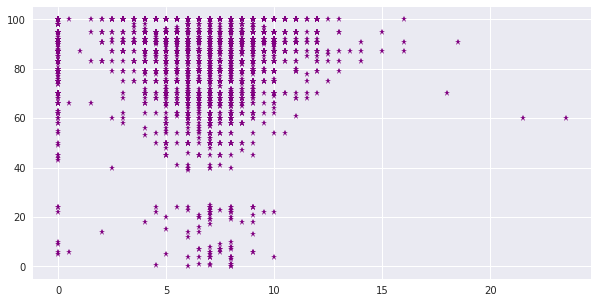

In [47]:
plt.plot(arr[:, 0], arr[:, 1], color="purple", marker="*", linestyle=' ')

### Hours slept Vs Temporal Memory Score

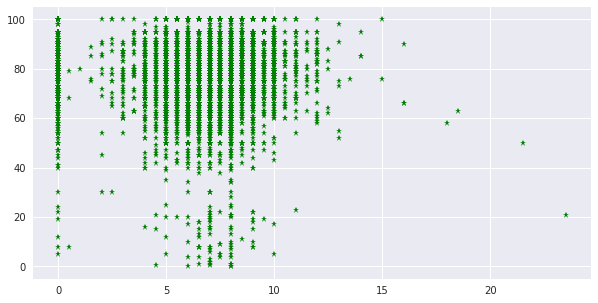

In [48]:
plt.plot(arr[:, 0], arr[:, 2], 'g*')

We can see from the plot that people that got about 7-9 hours of sleep the night before the survey has higher Recognition Score as well as higher Temporal Memory Score and alot of people that got zero sleep too did - I'd like to hear your explanation for this :-)


## That's all for now guys :)